<a href="https://colab.research.google.com/github/Rch-9271/Machine_Learning_ES335/blob/main/Machine_learning_preliminary_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Soln: To perform a mltiplication of a (n,k) and (k,m) matrix-

  multipications: n.m.k

  additions: n.m.(k-1)

Explanation:

input matrix dimensions: A(n,k) and B(k,m)

output matrix dimension: C(n,m)

we know $C_{ij} = \sum\limits_{r=1}^{k} A_{ir} \cdot B_{rj}$.

we have k pairs of $(A_{ir} ,B_{rj})$ for every $(C_{ij})$, hence k multiplications. We have (n.m) entries, therefore total no. of multiplication is: (n.m.k).

For summing k products we need (k-1) additions. [example: for adding 3 numbers we need 2 addition operators]. Hence total no. of addition required is: (n.m.(k-1).)

Lets $A =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}$ and $B =
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix},$

$C = A * B =
\begin{bmatrix}
c_{11} & c_{12} \\
c_{21} & c_{22}
\end{bmatrix}$

$ where
\begin{bmatrix}
c_{11} &= a_{11} b_{11} + a_{12} b_{21} \\
c_{12} &= a_{11} b_{12} + a_{12} b_{22} \\
c_{21} &= a_{21} b_{11} + a_{22} b_{21} \\
c_{22} &= a_{21} b_{12} + a_{22} b_{22}
\end{bmatrix}$

$\text{Multiplications:} \quad n \cdot m \cdot k = 2 \cdot 2 \cdot 2 = 8$

$\text{Additions:} \quad n \cdot m \cdot (k - 1) = 2 \cdot 2 \cdot 1 = 4$





Q2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Soln:

For multiplying two
(500 × 500) (500×500) matrices:

List of lists (pure Python triple loop): ~18 seconds

NumPy: ~0.17 seconds

Reason:
The list-of-lists implementation uses Python’s triple nested loops, performing
n.m.k individual operations in the Python interpreter. This is slow because each number is a Python object and every arithmetic operation has significant overhead.

In contrast, NumPy stores data in contiguous memory and uses optimized, precompiled libraries for matrix multiplication. These libraries perform operations in bulk (vectorization) and can utilize CPU-specific optimizations such as multithreading.


In [18]:
import random
import time

n = int(input("Enter number of rows for Matrix A: "))
k_A = int(input("Enter number of columns for Matrix A: "))
k_B = int(input("Enter number of rows for Matrix B: "))
m = int(input("Enter number of columns for Matrix B: "))

if k_A != k_B:
    print("Error: Number of columns in A must equal number of rows in B!")
else:
    A = [[random.randint(0, 9) for _ in range(k_A)] for _ in range(n)]
    B = [[random.randint(0, 9) for _ in range(m)] for _ in range(k_B)]

    C = [[0 for _ in range(m)] for _ in range(n)]

    start_time = time.time()
    for i in range(n):
        for j in range(m):
            for r in range(k_A):
                C[i][j] += A[i][r] * B[r][j]
    end_time = time.time()

    # Always display matrices
    print("\nMatrix A:")
    for row in A:
        print(row)

    print("\nMatrix B:")
    for row in B:
        print(row)

    print("\nResult Matrix C:")
    for row in C:
        print(row)

    print(f"\nExecution Time: {end_time - start_time:.6f} seconds")


Enter number of rows for Matrix A: 3
Enter number of columns for Matrix A: 3
Enter number of rows for Matrix B: 3
Enter number of columns for Matrix B: 3

Matrix A:
[7, 2, 8]
[5, 3, 3]
[5, 5, 1]

Matrix B:
[8, 3, 3]
[4, 4, 9]
[5, 2, 7]

Result Matrix C:
[104, 45, 95]
[67, 33, 63]
[65, 37, 67]

Execution Time: 0.000014 seconds


In [19]:
import numpy as np
import time

n = int(input("Enter number of rows for Matrix A: "))
k_A = int(input("Enter number of columns for Matrix A: "))
k_B = int(input("Enter number of rows for Matrix B: "))
m = int(input("Enter number of columns for Matrix B: "))

if k_A != k_B:
    print("Error: Number of columns in A must equal number of rows in B!")
else:
    # Random matrix generation with NumPy
    A = np.random.randint(0, 10, size=(n, k_A))
    B = np.random.randint(0, 10, size=(k_B, m))

    start_time = time.time()
    C = np.dot(A, B)  # NumPy matrix multiplication
    end_time = time.time()

    # Always display matrices
    print("\nMatrix A:")
    print(A)

    print("\nMatrix B:")
    print(B)

    print("\nResult Matrix C:")
    print(C)

    print(f"\nExecution Time: {end_time - start_time:.6f} seconds")


Enter number of rows for Matrix A: 500
Enter number of columns for Matrix A: 200
Enter number of rows for Matrix B: 200
Enter number of columns for Matrix B: 300

Matrix A:
[[0 6 1 ... 2 1 8]
 [3 7 2 ... 9 9 9]
 [5 1 0 ... 5 3 2]
 ...
 [7 2 3 ... 2 0 9]
 [6 0 3 ... 8 5 4]
 [0 5 1 ... 0 8 7]]

Matrix B:
[[7 4 5 ... 2 2 3]
 [4 1 4 ... 3 6 0]
 [7 3 8 ... 7 0 4]
 ...
 [0 5 8 ... 1 6 7]
 [6 0 3 ... 0 6 8]
 [4 6 4 ... 3 2 4]]

Result Matrix C:
[[4026 4384 3697 ... 4136 4265 4205]
 [3557 4144 3673 ... 3870 4058 4329]
 [3533 4029 3725 ... 3910 3966 4044]
 ...
 [4003 4326 3624 ... 3948 4072 4363]
 [3484 4288 3689 ... 3707 3735 3886]
 [3715 4504 4021 ... 4184 3902 4166]]

Execution Time: 0.024033 seconds


Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Soln:

To find the kth largest element using this method, we need k passes through the array.For an array of n elements, median is the element at the middle position in the sorted order. If n is odd, (n+1)/2 element is the median. If n is even, its the avg of n/2 and (n/2)+1 ( roughly the n/2-th largest element).

Each pass scans n elements, time per pass is O(n). We perform n/2 passes.
Total time = O(n) x n/2 $ \approx O(n^2)$ .

Better method: Quickselect with a time coplexity of $  O(n)$ . It is much faster than repeated scanning because it only recursing into the side that contains the desired element.

# Comparison of Median Finding Methods

The table below shows the execution times (in seconds) for finding the median of arrays of different sizes using three methods:

| Array Size | Naive Method \(O(n^2)\) | Quickselect (Avg. \(O(n)\)) | NumPy Median (Optimized) |
|------------|-------------------------|-----------------------------|--------------------------|
| 100        | 0.000103                | 0.000075                    | 0.004831                 |
| 500        | 0.002028                | 0.000323                    | 0.000226                 |
| 1000       | 0.009296                | 0.000433                    | 0.000251                 |

---

### Analysis

The **naive method** repeatedly scans the array to find and remove the maximum element until the median is obtained. Since it requires approximately $( \frac{n}{2} )$ passes over the array, its time complexity is about \( O(n^2) \). This causes the execution time to increase significantly as the array size grows.

The **Quickselect method** uses a partition-based approach inspired by Quicksort, processing only the portion of the array containing the median. Its average time complexity is \( O(n) \), resulting in much faster median computation for larger arrays.

The **NumPy median** function is a highly optimized routine implemented in compiled code, often using advanced algorithms such as partial sorting or Quickselect variants. Its performance is comparable to or better than Quickselect in practice.

---

### Conclusion

The results clearly show that the naive method is inefficient for large datasets, while Quickselect and NumPy’s median provide much better performance.


In [20]:
import numpy as np
import random
import time

# Naive method: find median by repeatedly removing max
def median_naive(numbers):
    arr = numbers.copy()
    length = len(arr)
    mid = length // 2
    for _ in range(mid):
        max_val = max(arr)
        arr.remove(max_val)
    if length % 2 == 1:
        return max(arr)
    else:
        max1 = max(arr)
        arr.remove(max1)
        max2 = max(arr)
        return (max1 + max2) / 2

# Quickselect method
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]
    pivot = random.choice(arr)
    less = [x for x in arr if x < pivot]
    greater = [x for x in arr if x > pivot]
    equal = [x for x in arr if x == pivot]

    if k < len(less):
        return quickselect(less, k)
    elif k < len(less) + len(equal):
        return pivot
    else:
        return quickselect(greater, k - len(less) - len(equal))

def median_quickselect(numbers):
    length = len(numbers)
    if length % 2 == 1:
        return quickselect(numbers, length // 2)
    else:
        left = quickselect(numbers, length // 2 - 1)
        right = quickselect(numbers, length // 2)
        return (left + right) / 2

# 3. Test and time the methods
sizes = [100, 500, 1000]
for size in sizes:
    data = [random.randint(0, 100000) for _ in range(size)]

    start = time.time()
    median_naive(data)
    naive_time = time.time() - start

    start = time.time()
    median_quickselect(data)
    quick_time = time.time() - start

    start = time.time()
    np.median(data)
    numpy_time = time.time() - start

    print(f"Size: {size}")
    print(f"Naive time: {naive_time:.6f} sec")
    print(f"Quickselect time: {quick_time:.6f} sec")
    print(f"NumPy time: {numpy_time:.6f} sec\n")


Size: 100
Naive time: 0.000115 sec
Quickselect time: 0.000122 sec
NumPy time: 0.000589 sec

Size: 500
Naive time: 0.002029 sec
Quickselect time: 0.000293 sec
NumPy time: 0.000364 sec

Size: 1000
Naive time: 0.004776 sec
Quickselect time: 0.000492 sec
NumPy time: 0.000194 sec



Q4. What is the gradient of the following function with respect to x and y?

$f(x, y) = x^2y + y^3\sin(x)$

Soln: We compute the partial derivatives with respect to \(x\) and \(y\):

$$
\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)
$$

Therefore, the gradient is:

$$
\nabla f(x, y) = \left( 2xy + y^3\cos(x),\; x^2 + 3y^2\sin(x) \right)
$$




Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [21]:
# Enable 64-bit mode in JAX (must be before importing jax.numpy)
import jax
jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp
from jax import grad
import numpy as np

# Define function using JAX arrays
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Analytical gradient
def analytical_grad(x, y):
    df_dx = 2.0 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3.0 * y**2 * jnp.sin(x)
    return df_dx, df_dy

# Autodiff gradient from JAX
jax_grad = grad(f, argnums=(0, 1))

# Test on random points
rng = np.random.default_rng(12345)
test_points = rng.uniform(low=-2.0, high=2.0, size=(6, 2))

print("Comparing analytical gradients to JAX autodiff gradients:\n")
for i, (x0, y0) in enumerate(test_points, 1):
    a_dx, a_dy = analytical_grad(x0, y0)
    j_dx, j_dy = jax_grad(x0, y0)

    eq_dx = np.allclose(a_dx, j_dx, atol=1e-9, rtol=1e-6)
    eq_dy = np.allclose(a_dy, j_dy, atol=1e-9, rtol=1e-6)

    print(f"Point {i}: x={x0:.6f}, y={y0:.6f}")
    print(f"  analytical df/dx = {a_dx:.12f}")
    print(f"  jax       df/dx = {j_dx:.12f}   match: {eq_dx}")
    print(f"  analytical df/dy = {a_dy:.12f}")
    print(f"  jax       df/dy = {j_dy:.12f}   match: {eq_dy}")
    print()

print("All gradients matched JAX autodiff:", all(eq_dx and eq_dy for (x0, y0) in test_points))


Comparing analytical gradients to JAX autodiff gradients:

Point 1: x=-1.090656, y=-0.732967
  analytical df/dx = 1.416940781249
  jax       df/dx = 1.416940781249   match: True
  analytical df/dy = -0.239952880459
  jax       df/dy = -0.239952880459   match: True

Point 2: x=1.189462, y=0.705019
  analytical df/dx = 1.807601637071
  jax       df/dx = 1.807601637071   match: True
  analytical df/dy = 2.798862114637
  jax       df/dy = 2.798862114637   match: True

Point 3: x=-0.435562, y=-0.668744
  analytical df/dx = 0.311407527627
  jax       df/dx = 0.311407527627   match: True
  analytical df/dy = -0.376357493117
  jax       df/dy = -0.376357493117   match: True

Point 4: x=0.393235, y=-1.253063
  analytical df/dx = -2.802843664456
  jax       df/dx = -2.802843664456   match: True
  analytical df/dy = 1.959597159054
  jax       df/dy = 1.959597159054   match: True

Point 5: x=0.691024, y=1.767211
  analytical df/dx = 6.695328804656
  jax       df/dx = 6.695328804656   match: True
 

Q6. Use sympy to confirm that you obtain the same gradient analytically.



In [22]:
import sympy as sp
x, y = sp.symbols('x y', real=True)

f = x**2 * y + y**3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Symbolic df/dx:", df_dx)
print("Symbolic df/dy:", df_dy)

df_dx_expected = 2*x*y + y**3 * sp.cos(x)
df_dy_expected = x**2 + 3*y**2 * sp.sin(x)

print("\nMatches expected df/dx:", sp.simplify(df_dx - df_dx_expected) == 0)
print("Matches expected df/dy:", sp.simplify(df_dy - df_dy_expected) == 0)


Symbolic df/dx: 2*x*y + y**3*cos(x)
Symbolic df/dy: x**2 + 3*y**2*sin(x)

Matches expected df/dx: True
Matches expected df/dy: True


Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

    1. 2022
        1. Branch 1
            1. Roll Number: 1, Name: N, Marks:
                1. Maths: 100, English: 70 ...
        2. Branch 2
    2. 2023
        1. Branch 1
        2. Branch 2
    3. 2024
        1. Branch 1
        2. Branch 2
    4. 2025
        1. Branch 1
        2. Branch 2


In [23]:
# Nested dictionary from first example
student_records = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 85
                }
            },
            {
                "Roll Number": 2,
                "Name": "M",
                "Marks": {
                    "Maths": 90,
                    "English": 75,
                    "Science": 88
                }
            }
        ],
        "Branch 2": []
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}

def access_student_data():
    year = int(input("Enter Year (2022-2025): "))
    if year not in student_records:
        print("Year not found.")
        return

    branch = input("Enter Branch (Branch 1 / Branch 2): ")
    if branch not in student_records[year]:
        print("Branch not found.")
        return

    roll_no = int(input("Enter Roll Number: "))
    students = student_records[year][branch]

    for student in students:
        if student["Roll Number"] == roll_no:
            print(f"\n Name: {student['Name']}")
            print("Marks:")
            for subject, marks in student["Marks"].items():
                print(f"  {subject}: {marks}")
            return

    print(" Student not found.")

access_student_data()


Enter Year (2022-2025): 2022
Enter Branch (Branch 1 / Branch 2): Branch 1
Enter Roll Number: 1

 Name: N
Marks:
  Maths: 100
  English: 70
  Science: 85


Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



In [24]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # dict of subject: marks


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # list of Student objects

    def add_student(self, student):
        self.students.append(student)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # list of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)


class Database:
    def __init__(self):
        self.years = []  # list of Year objects

    def add_year(self, year):
        self.years.append(year)

    def display(self):
        for i, year in enumerate(self.years, start=1):
            print(f"{i}. {year.year}")
            for j, branch in enumerate(year.branches, start=1):
                print(f"    {j}. {branch.name}")
                for k, student in enumerate(branch.students, start=1):
                    print(f"        {k}. Roll Number: {student.roll_number}, Name: {student.name}, Marks:")
                    for m, (subject, marks) in enumerate(student.marks.items(), start=1):
                        print(f"            {m}. {subject}: {marks}")


# data creation
db = Database()

year2022 = Year(2022)
branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "N", {"Maths": 100, "English": 70}))
branch2_2022 = Branch("Branch 2")

year2022.add_branch(branch1_2022)
year2022.add_branch(branch2_2022)
db.add_year(year2022)


year2023 = Year(2023)
year2023.add_branch(Branch("Branch 1"))
year2023.add_branch(Branch("Branch 2"))
db.add_year(year2023)

year2024 = Year(2024)
year2024.add_branch(Branch("Branch 1"))
year2024.add_branch(Branch("Branch 2"))
db.add_year(year2024)


year2025 = Year(2025)
year2025.add_branch(Branch("Branch 1"))
year2025.add_branch(Branch("Branch 2"))
db.add_year(year2025)

db.display()


1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100
            2. English: 70
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$
2. $y = x^2$
3. $y = \frac{x^3}{100}$
4. $y = \sin(x)$
5. $y = \frac{\sin(x)}{x}$
6. $y = \log(x)$
7. $y = e^x$


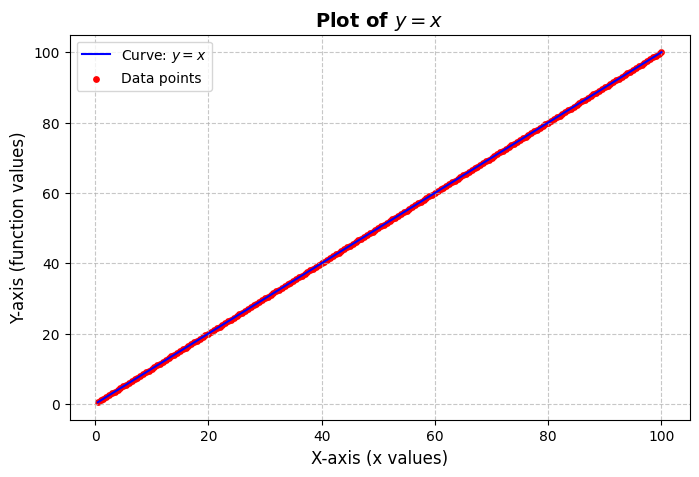

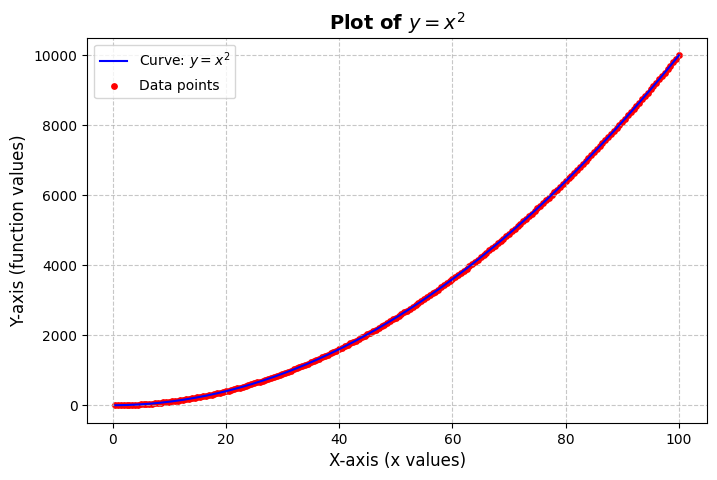

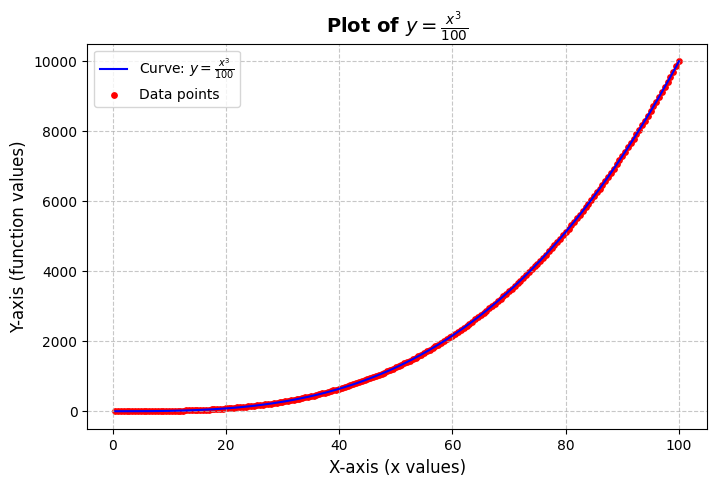

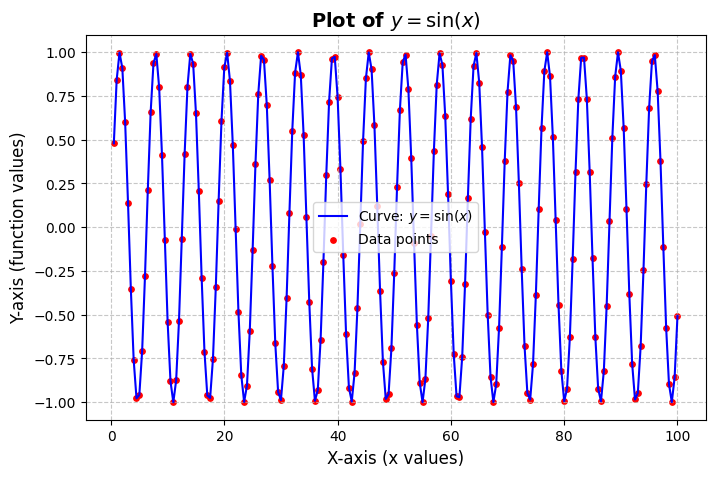

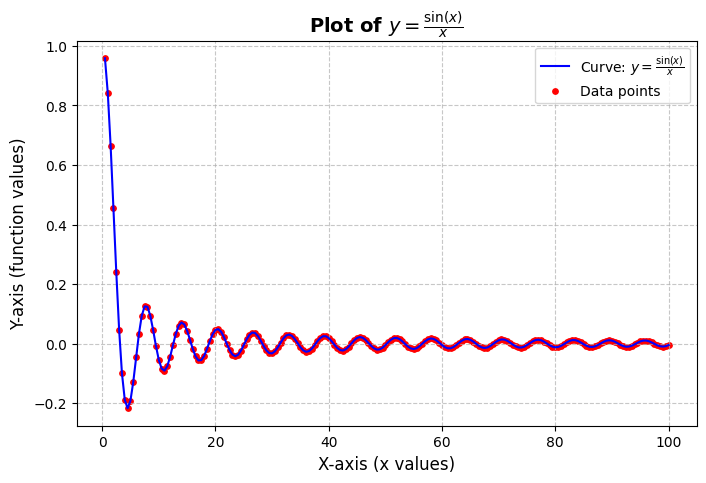

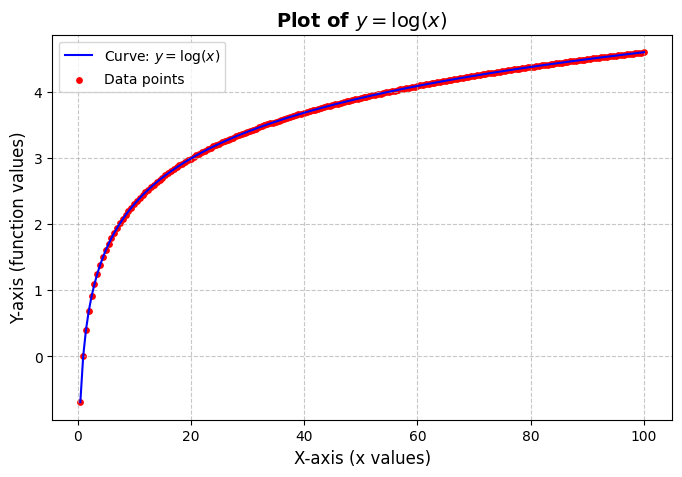

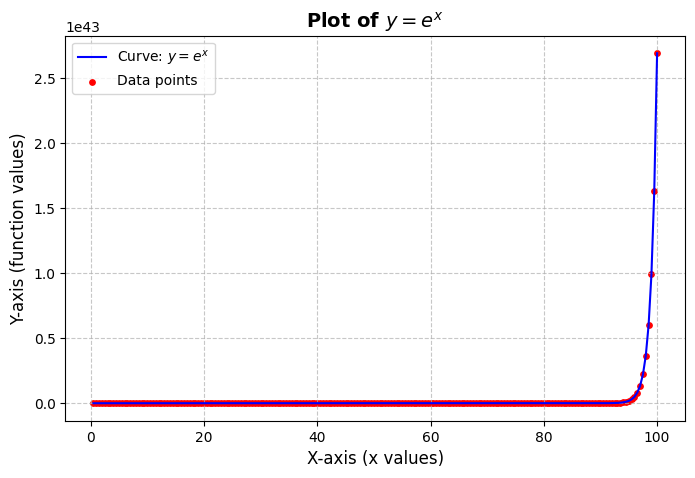

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

functions = [
    (x, r"$y = x$"),
    (x**2, r"$y = x^2$"),
    ((x**3) / 100, r"$y = \frac{x^3}{100}$"),
    (np.sin(x), r"$y = \sin(x)$"),
    (np.sin(x) / x, r"$y = \frac{\sin(x)}{x}$"),
    (np.log(x), r"$y = \log(x)$"),
    (np.exp(x), r"$y = e^x$")
]

for y, label in functions:
    plt.figure(figsize=(8, 5))


    plt.plot(x, y, color='blue', label=f"Curve: {label}")

    plt.scatter(x, y, color='red', s=15, label="Data points")

    plt.xlabel("X-axis (x values)", fontsize=12)
    plt.ylabel("Y-axis (function values)", fontsize=12)
    plt.title(f"Plot of {label}", fontsize=14, fontweight='bold')

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()


Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [26]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

col_with_max_std = df.std().idxmax()
max_std_value = df.std().max()
col_values = df[[col_with_max_std]]

row_with_min_mean = df.mean(axis=1).idxmin()
min_mean_value = df.mean(axis=1).min()
row_values = df.loc[[row_with_min_mean]]

print("Full DataFrame:")
display(df)

print(f"\nColumn with highest standard deviation: '{col_with_max_std}' (std = {max_std_value:.4f})")
display(col_values)

print(f"\nRow with lowest mean: Row index {row_with_min_mean} (mean = {min_mean_value:.4f})")
display(row_values)


Full DataFrame:


,a,b,c,d,e
0,1.070589,1.075179,1.612001,1.928990,1.060304
1,1.345478,1.890590,1.618509,1.383381,1.043664
2,1.304685,1.786969,1.582454,1.727873,1.086206
3,1.357329,1.971392,1.233844,1.079806,1.054609
4,1.176186,1.187174,1.065761,1.087772,1.183165
5,1.464452,1.566032,1.722157,1.755955,1.038577
6,1.666174,1.046193,1.094952,1.386829,1.866552
7,1.728190,1.080957,1.330887,1.090244,1.440337
8,1.193960,1.990314,1.392305,1.015202,1.707788
9,1.953113,1.219234,1.114220,1.360965,1.874598



Column with highest standard deviation: 'e' (std = 0.3416)


,e
0,1.060304
1,1.043664
2,1.086206
3,1.054609
4,1.183165
5,1.038577
6,1.866552
7,1.440337
8,1.707788
9,1.874598



Row with lowest mean: Row index 4 (mean = 1.1400)


,a,b,c,d,e
4,1.176186,1.187174,1.065761,1.087772,1.183165


Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [27]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

col_with_max_std = df.std().idxmax()
max_std_value = df.std().max()
col_values = df[[col_with_max_std]]

row_with_min_mean = df.mean(axis=1).idxmin()
min_mean_value = df.mean(axis=1).min()
row_values = df.loc[[row_with_min_mean]]

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_lt8_rows = (df['g'] == 'LT8').sum()

std_f_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_f_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Full DataFrame:")
display(df)

print(f"\nColumn with highest standard deviation: '{col_with_max_std}' (std = {max_std_value:.4f})")
display(col_values)

print(f"\nRow with lowest mean: Row index {row_with_min_mean} (mean = {min_mean_value:.4f})")
display(row_values)

print(f"Number of rows where g = 'LT8': {num_lt8_rows}")
print(f"Standard deviation of f (LT8): {std_f_lt8:.4f}")
print(f"Standard deviation of f (GT8): {std_f_gt8:.4f}")


Full DataFrame:


,a,b,c,d,e,f,g
0,1.644169,1.806677,1.303373,1.417382,1.502695,7.674296,LT8
1,1.124469,1.017668,1.357515,1.694841,1.030040,6.224533,LT8
2,1.783275,1.604609,1.021488,1.245194,1.227007,6.881572,LT8
3,1.609185,1.659665,1.624445,1.921346,1.939819,8.754459,GT8
4,1.846417,1.310327,1.067242,1.427407,1.630496,7.281888,LT8
5,1.796443,1.885433,1.992122,1.396095,1.992946,9.063039,GT8
6,1.587079,1.501836,1.574674,1.516169,1.047610,7.227367,LT8
7,1.165531,1.589968,1.914996,1.535197,1.442492,7.648185,LT8
8,1.664375,1.375424,1.055948,1.627446,1.695204,7.418396,LT8
9,1.333435,1.132279,1.392810,1.271665,1.833874,6.964063,LT8



Column with highest standard deviation: 'e' (std = 0.3465)


,e
0,1.502695
1,1.030040
2,1.227007
3,1.939819
4,1.630496
5,1.992946
6,1.047610
7,1.442492
8,1.695204
9,1.833874



Row with lowest mean: Row index 1 (mean = 1.2449)


,a,b,c,d,e
1,1.124469,1.017668,1.357515,1.694841,1.03004


Number of rows where g = 'LT8': 17
Standard deviation of f (LT8): 0.4573
Standard deviation of f (GT8): 0.2131


Q12. Write a small piece of code to explain broadcasting in numpy.


In [28]:
import numpy as np
# Example 1: Successful broadcasting
a = np.array([1, 2, 3])
b = np.array([[10], [20], [30]])

result = a + b  # Works because shapes are compatible
print("Successful broadcasting result:\n", result)
print("Shape:", result.shape, "\n")

# Example 2: Another successful case
x = np.ones((2, 3))
y = np.array([5, 10, 15])
print("Another broadcasting result:\n", x + y, "\n")

# Example 3: Failing case
p = np.ones((3, 2))
q = np.ones((3, 3))
try:
    r = p + q
except ValueError as e:
    print("Broadcasting failed:")
    print(e, "\n")

# ----------------------------
# Why it fails:
# Shapes (3,2) and (3,3) are compared from right to left:
#   - Last dimension: 2 vs 3 → mismatch (neither is 1)
#   - So, broadcasting is not possible.
# ----------------------------


Successful broadcasting result:
 [[11 12 13]
 [21 22 23]
 [31 32 33]]
Shape: (3, 3) 

Another broadcasting result:
 [[ 6. 11. 16.]
 [ 6. 11. 16.]] 

Broadcasting failed:
operands could not be broadcast together with shapes (3,2) (3,3)  



Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [29]:
import numpy as np

def my_argmin_2d(arr):

    flat_index = 0
    min_value = arr.flat[0]

    for idx, value in enumerate(arr.flat):
        if value < min_value:
            min_value = value
            flat_index = idx

    # Convert flat index to multi-dimensional index
    return np.unravel_index(flat_index, arr.shape)

# Take input from user
rows = int(input("Enter number of rows: "))
cols = int(input("Enter number of columns: "))

print(f"Enter {rows*cols} elements separated by spaces:")
user_input = list(map(float, input().split()))

# Create array
arr = np.array(user_input).reshape(rows, cols)

# Custom argmin
custom_pos = my_argmin_2d(arr)

# NumPy's argmin for verification
numpy_pos = np.unravel_index(np.argmin(arr), arr.shape)

print("\nArray:\n", arr)
print("Custom argmin position:", custom_pos, "Value:", arr[custom_pos])
print("NumPy argmin position:", numpy_pos, "Value:", arr[numpy_pos])
print("Match:", custom_pos == numpy_pos)


Enter number of rows: 3
Enter number of columns: 5
Enter 15 elements separated by spaces:
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Array:
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]]
Custom argmin position: (np.int64(0), np.int64(0)) Value: 1.0
NumPy argmin position: (np.int64(0), np.int64(0)) Value: 1.0
Match: True
